In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kruskal
%matplotlib inline

In [7]:
# Load datasets
benin_df = pd.read_csv('../data/benin_clean.csv')
sierra_leone_df = pd.read_csv('../data/sierraleone_clean.csv')
togo_df = pd.read_csv('../data/togo_clean.csv')

# Add country identifier
benin_df['Country'] = 'Benin'
sierra_leone_df['Country'] = 'Sierra Leone'
togo_df['Country'] = 'Togo'

# Merge datasets
combined_df = pd.concat([benin_df, sierra_leone_df, togo_df], ignore_index=True)

# Check dataset structure and missing values
print("Combined Dataset Info:")
print(combined_df.info())
print("\nMissing Values in GHI, DNI, DHI:")
print(combined_df[['GHI', 'DNI', 'DHI']].isnull().sum())

# Drop rows missing GHI, DNI, or DHI
combined_df = combined_df.dropna(subset=['GHI', 'DNI', 'DHI'])

# Validate data ranges
print("\nData Ranges:")
print(combined_df[['GHI', 'DNI', 'DHI']].describe())

Combined Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 28 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null

In [8]:
# Summary table for GHI, DNI, DHI
summary_table = combined_df.groupby('Country').agg({
    'GHI': ['mean', 'median', 'std'],
    'DNI': ['mean', 'median', 'std'],
    'DHI': ['mean', 'median', 'std']
}).round(2)

# Flatten column names
summary_table.columns = ['_'.join(col).strip() for col in summary_table.columns.values]
print("Summary Table for GHI, DNI, DHI:\n", summary_table)

# Save summary table
summary_table.to_csv('summary_table.csv')

Summary Table for GHI, DNI, DHI:
               GHI_mean  GHI_median  GHI_std  DNI_mean  DNI_median  DNI_std  \
Country                                                                      
Benin           240.56         1.8   331.13    167.19        -0.1   261.71   
Sierra Leone    201.96         0.3   298.50    116.38        -0.1   218.65   
Togo            230.56         2.1   322.53    151.26         0.0   250.96   

              DHI_mean  DHI_median  DHI_std  
Country                                      
Benin           115.36         1.6   158.69  
Sierra Leone    113.72        -0.1   158.95  
Togo            116.44         2.5   156.52  


C:\Users\girma\AppData\Local\Temp\ipykernel_14472\1181943740.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='GHI', data=combined_df, palette=['#FF6384', '#36A2EB', '#FFCE56'], ax=axes[0])
C:\Users\girma\AppData\Local\Temp\ipykernel_14472\1181943740.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='DNI', data=combined_df, palette=['#FF6384', '#36A2EB', '#FFCE56'], ax=axes[1])
C:\Users\girma\AppData\Local\Temp\ipykernel_14472\1181943740.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Country', y='

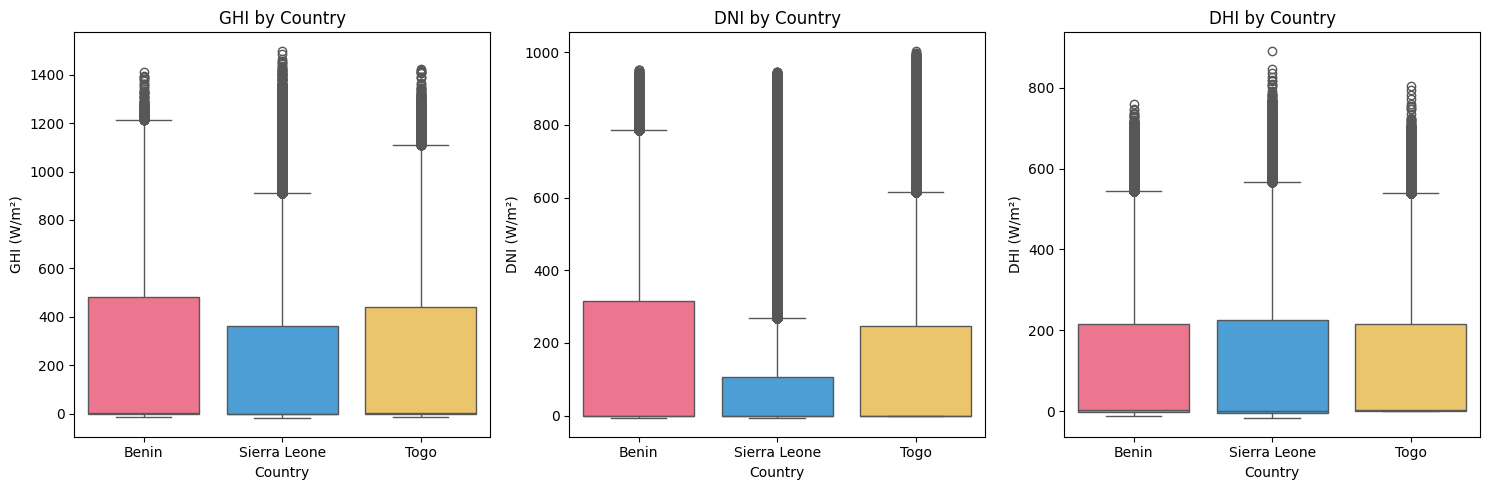

In [9]:
# Create subplots for GHI, DNI, DHI
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

# Boxplot for GHI
sns.boxplot(x='Country', y='GHI', data=combined_df, palette=['#FF6384', '#36A2EB', '#FFCE56'], ax=axes[0])
axes[0].set_title('GHI by Country')
axes[0].set_ylabel('GHI (W/m²)')
axes[0].set_xlabel('Country')

# Boxplot for DNI
sns.boxplot(x='Country', y='DNI', data=combined_df, palette=['#FF6384', '#36A2EB', '#FFCE56'], ax=axes[1])
axes[1].set_title('DNI by Country')
axes[1].set_ylabel('DNI (W/m²)')
axes[1].set_xlabel('Country')

# Boxplot for DHI
sns.boxplot(x='Country', y='DHI', data=combined_df, palette=['#FF6384', '#36A2EB', '#FFCE56'], ax=axes[2])
axes[2].set_title('DHI by Country')
axes[2].set_ylabel('DHI (W/m²)')
axes[2].set_xlabel('Country')

plt.tight_layout()
plt.show()

In [12]:
# Kruskal-Wallis test for GHI
ghi_groups = [combined_df[combined_df['Country'] == country]['GHI'] for country in ['Benin', 'Sierra Leone', 'Togo']]
stat, p_value = kruskal(*ghi_groups)
print(f"Kruskal-Wallis Test for GHI: statistic={stat:.2f}, p-value={p_value:.4f}")
if p_value < 0.05:
    print("Significant differences in GHI between countries (p < 0.05).")
else:
    print("No significant differences in GHI between countries (p >= 0.05).")

Kruskal-Wallis Test for GHI: statistic=4524.88, p-value=0.0000
Significant differences in GHI between countries (p < 0.05).


C:\Users\girma\AppData\Local\Temp\ipykernel_14472\4138788596.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country', y='GHI', data=combined_df, estimator=np.mean, errorbar=None, palette=['#FF6384', '#36A2EB', '#FFCE56'])


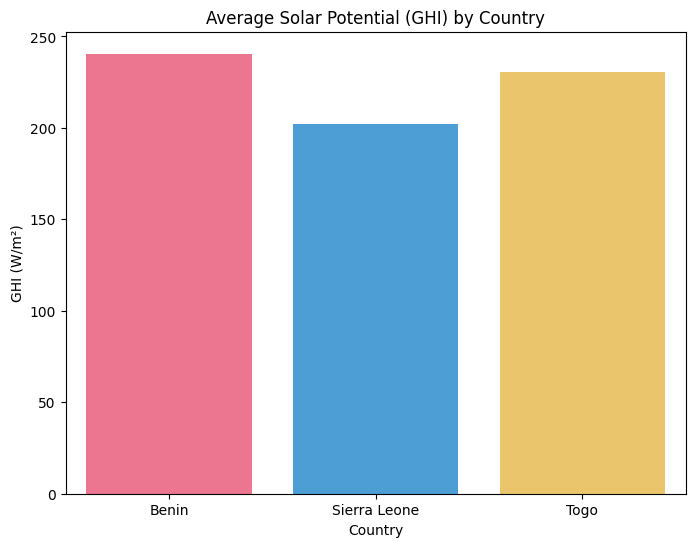

In [13]:
# Bar chart for average GHI
plt.figure(figsize=(8, 6))
sns.barplot(x='Country', y='GHI', data=combined_df, estimator=np.mean, errorbar=None, palette=['#FF6384', '#36A2EB', '#FFCE56'])
plt.title('Average Solar Potential (GHI) by Country')
plt.ylabel('GHI (W/m²)')
plt.xlabel('Country')
plt.show()

## Key Observations
- **Benin leads in solar potential but with high variability**: Benin has the highest mean GHI (240.56 W/m²) and DNI (167.19 W/m²), making it the most promising for solar energy, especially for concentrated solar power (CSP). However, its high GHI standard deviation (331.13) indicates significant variability, likely due to weather fluctuations, which could impact reliability.
- **Sierra Leone lags in solar potential, likely due to cloud cover**: Sierra Leone has the lowest mean GHI (201.96 W/m²) and DNI (116.38 W/m²), suggesting reduced solar potential, possibly due to higher cloud cover or precipitation, as reflected in lower DNI values critical for direct solar applications.
- **Data quality concerns need addressing for reliable insights**: Negative median values in DNI (-0.1 W/m² for Benin/Sierra Leone) and DHI (-0.1 W/m² for Sierra Leone) indicate potential data issues, as irradiance should be non-negative. This, combined with significant GHI differences (p-value = 0.0000), suggests cleaning or filtering the data (e.g., removing negative values) to improve analysis reliability.

In [14]:
# Save combined dataset
combined_df.to_csv('combined_solar_data.csv', index=False)